# Analysis of the behavioral data of a virtual city free walk
This behavioral data contains the player's saved positions and rotations during the virtual city walk for both head and eye movements. Additionally, the "HON" variable contains the kind of object the player looked at.

## 1. Load data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BehavioralData/Behavior_new_02715e7a-5a68-471b-9e63-f056c5f0df81.csv')

df.head(50)

,Unnamed: 0,valid,leftBlink,rightBlink,ETWTime,ETWoriginX,ETWoriginY,ETWoriginZ,ETWdirectionX,ETWdirectionY,...,ETLoriginZ,ETLdirectionX,ETLdirectionY,ETLdirectionZ,HToriginX,HToriginY,HToriginZ,HTdirectionX,HTdirectionY,HTdirectionZ
0,0.000,1.0,0.0,0.0,58.655426,13.412971,12.306775,21.046938,0.942591,0.099437,...,-0.026742,0.086533,0.113068,0.989807,13.420355,12.303403,21.029396,0.969479,-0.037709,-0.242255
1,0.018,1.0,0.0,0.0,58.666626,13.412885,12.306769,21.046755,0.942547,0.099320,...,-0.026736,0.086563,0.112869,0.989822,547.551270,2.045723,589.369324,0.969452,-0.037648,-0.242376
2,0.021,1.0,0.0,0.0,58.666626,13.412885,12.306769,21.046755,0.942547,0.099320,...,-0.026736,0.086563,0.112869,0.989822,547.551270,2.045723,589.369324,0.969452,-0.037648,-0.242376
3,0.103,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
4,0.105,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
5,0.106,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
6,0.107,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
7,0.108,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
8,0.109,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
9,0.110,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171


In [5]:
df.columns

Index(['Unnamed: 0', 'valid', 'leftBlink', 'rightBlink', 'ETWTime',
       'ETWoriginX', 'ETWoriginY', 'ETWoriginZ', 'ETWdirectionX',
       'ETWdirectionY', 'ETWdirectionZ', 'HON', 'ETLoriginX', 'ETLoriginY',
       'ETLoriginZ', 'ETLdirectionX', 'ETLdirectionY', 'ETLdirectionZ',
       'HToriginX', 'HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY',
       'HTdirectionZ'],
      dtype='object')

### Preprocessing
When looking into the file, we found its dimensions are 163661 x 24, and it contains missing values which we should fix or delete.

In [6]:
# File contains 163661 x 24
df.info()
# Check for NaN
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163661 entries, 0 to 163660
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     163661 non-null  float64
 1   valid          163661 non-null  float64
 2   leftBlink      163661 non-null  float64
 3   rightBlink     163661 non-null  float64
 4   ETWTime        163661 non-null  float64
 5   ETWoriginX     163661 non-null  float64
 6   ETWoriginY     163661 non-null  float64
 7   ETWoriginZ     163661 non-null  float64
 8   ETWdirectionX  163661 non-null  float64
 9   ETWdirectionY  163661 non-null  float64
 10  ETWdirectionZ  163661 non-null  float64
 11  HON            163470 non-null  object 
 12  ETLoriginX     163442 non-null  float64
 13  ETLoriginY     163442 non-null  float64
 14  ETLoriginZ     163442 non-null  float64
 15  ETLdirectionX  163442 non-null  float64
 16  ETLdirectionY  163442 non-null  float64
 17  ETLdirectionZ  163442 non-nul

Unnamed: 0         0
valid              0
leftBlink          0
rightBlink         0
ETWTime            0
ETWoriginX         0
ETWoriginY         0
ETWoriginZ         0
ETWdirectionX      0
ETWdirectionY      0
ETWdirectionZ      0
HON              191
ETLoriginX       219
ETLoriginY       219
ETLoriginZ       219
ETLdirectionX    219
ETLdirectionY    219
ETLdirectionZ    219
HToriginX        229
HToriginY        229
HToriginZ        229
HTdirectionX     229
HTdirectionY     229
HTdirectionZ     229
dtype: int64

After fixing preprocessing, the file length is 163432 x 24

In [7]:
# Delete NaN values and reset index
df_clean = df.dropna().reset_index(drop=True)
df_clean.info()
# df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163432 entries, 0 to 163431
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     163432 non-null  float64
 1   valid          163432 non-null  float64
 2   leftBlink      163432 non-null  float64
 3   rightBlink     163432 non-null  float64
 4   ETWTime        163432 non-null  float64
 5   ETWoriginX     163432 non-null  float64
 6   ETWoriginY     163432 non-null  float64
 7   ETWoriginZ     163432 non-null  float64
 8   ETWdirectionX  163432 non-null  float64
 9   ETWdirectionY  163432 non-null  float64
 10  ETWdirectionZ  163432 non-null  float64
 11  HON            163432 non-null  object 
 12  ETLoriginX     163432 non-null  float64
 13  ETLoriginY     163432 non-null  float64
 14  ETLoriginZ     163432 non-null  float64
 15  ETLdirectionX  163432 non-null  float64
 16  ETLdirectionY  163432 non-null  float64
 17  ETLdirectionZ  163432 non-nul

### 2. Eye vs head tracking data

In [80]:
head_origin = df_clean[['HToriginX', 'HToriginY', 'HToriginZ']]
player_direction = df_clean[['HTdirectionX', 'HTdirectionY', 'HTdirectionZ']]

# head_origin
# Save to CSV
# player_origin.to_csv('/Users/johnmadrid/Google Drive/Osnabrück/WS 2021/NeuroBioPsuchology_2021/Thesis/Players_positions_directions/positionsTestFull.csv', index=False)

# player_direction.to_csv('/Users/johnmadrid/Google Drive/Osnabrück/WS 2021/NeuroBioPsuchology_2021/Thesis/Players_positions_directions/directionsTestFull.csv', index=False)

,HToriginX,HToriginY,HToriginZ
0,13.420355,12.303403,21.029396
1,547.551270,2.045723,589.369324
2,547.551270,2.045723,589.369324
3,547.551208,2.045722,589.369141
4,547.551208,2.045722,589.369141
...,...,...,...
163427,527.346741,2.038607,593.383911
163428,527.346741,2.038620,593.384033
163429,527.346741,2.038561,593.384155
163430,527.346741,2.038495,593.384338


### 2.1 Total count distribution
The following exploratory analysis shows the range of the positions' origin and directions of the player during the virtual walk. The values are as expected. Namely, head's positions' origin on the y-axis stay mostly invariant and around zero because the player is sitting on a chair; x-and-y-axis values range between 500 and 650 approximately because they correspond to the limits of the area in the virtual city where participants were instructed to do the walk. Furthermore, the visualizations indicate that the head-tracking and the eye-tracking world data have similar distributions which seems to suggest we can use either of them when reconstructing the participant's virtual walk.


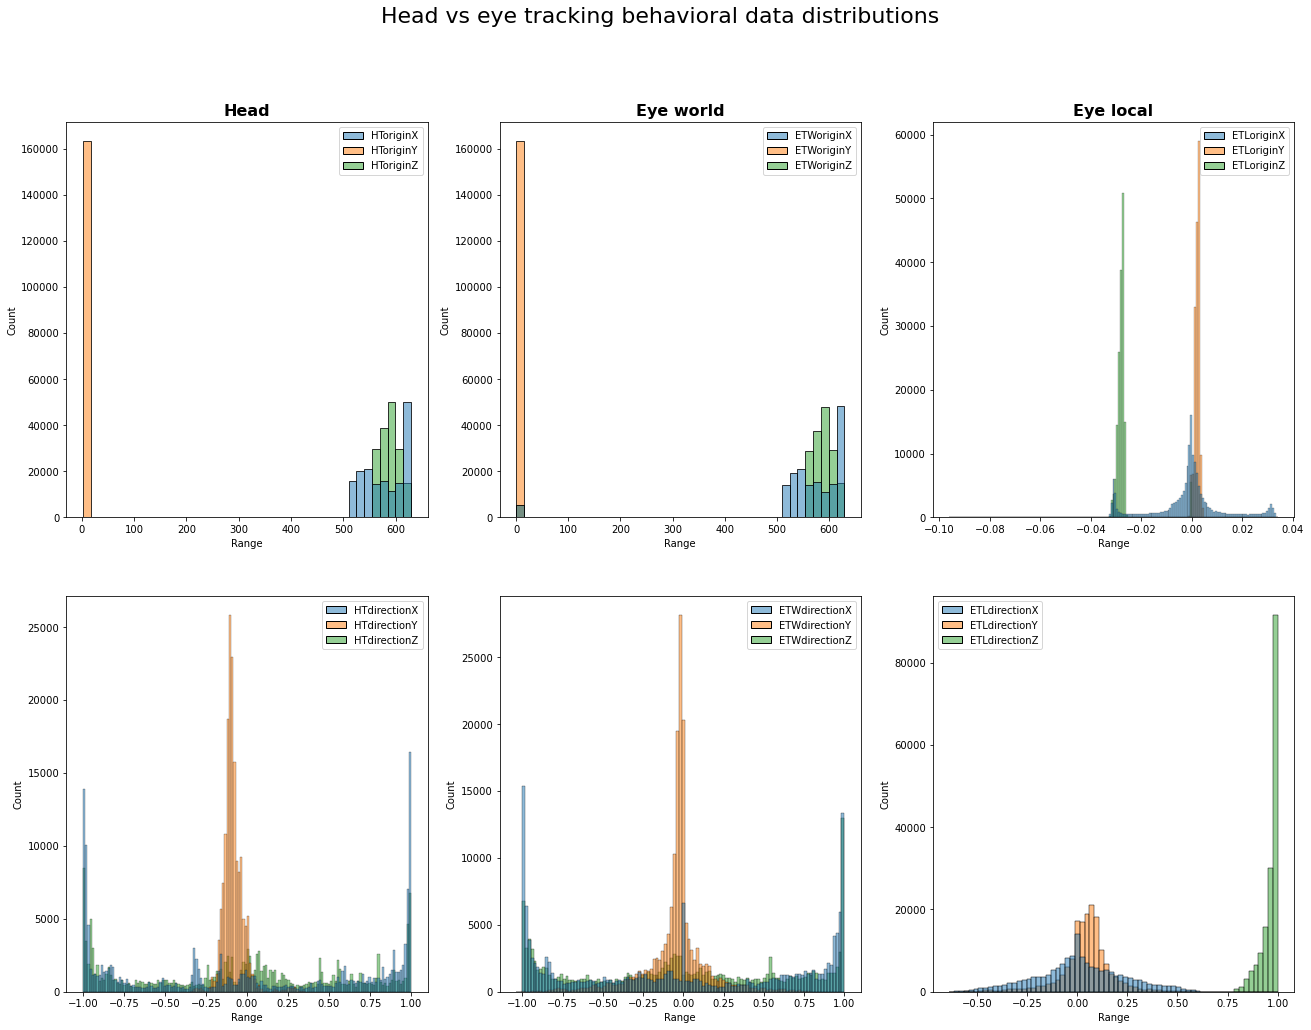

In [165]:
fig, ax = plt.subplots(2,3, figsize=(22, 16))

# head-tracking distribution
fig.suptitle("Head vs eye tracking behavioral data distributions", fontsize=22)
sns.histplot(df_clean[['HToriginX', 'HToriginY', 'HToriginZ']], ax=ax[0,0])
ax[0,0].set_xlabel('Range')
ax[0,0].set_ylabel('Count')

sns.histplot(df_clean[['HTdirectionX', 'HTdirectionY', 'HTdirectionZ']], ax=ax[1,0])
ax[1,0].set_xlabel('Range')
ax[1,0].set_ylabel('Count')

# eye-tracking local distribution
sns.histplot(df_clean[["ETWoriginX", "ETWoriginY", "ETWoriginZ"]], ax=ax[0,1])
ax[0,1].set_xlabel('Range')
ax[0,1].set_ylabel('Count')

sns.histplot(df_clean[["ETWdirectionX", "ETWdirectionY", "ETWdirectionZ"]], ax=ax[1,1])
ax[1,1].set_xlabel('Range')
ax[1,1].set_ylabel('Count')

# eye-tracking world distribution
sns.histplot(df_clean[["ETLdirectionX", "ETLdirectionY", "ETLdirectionZ"]], ax=ax[1,2])
ax[1,2].set_xlabel('Range')
ax[1,2].set_ylabel('Count')

sns.histplot(df_clean[["ETLoriginX", "ETLoriginY", "ETLoriginZ"]], ax=ax[0,2])
ax[0,2].set_xlabel('Range')
ax[0,2].set_ylabel('Count')


col_title = ['Head', 'Eye world', 'Eye local']
for i, ax in enumerate(ax.flatten()[:3]):
    ax.set_title(col_title[i], fontweight='bold', fontsize=16)
    i += 1

# fig.subplots_adjust(hspace=0.3)
# Save visualization/
# plt.savefig('Images/behavioral_distribution.eps', format='eps', dpi=1200)

In [121]:
df_clean[['HToriginX', 'ETWoriginX']].median()


HToriginX     579.412292
ETWoriginX    576.268450
dtype: float64

### 2.2 Origins' mean distribution

<AxesSubplot:>

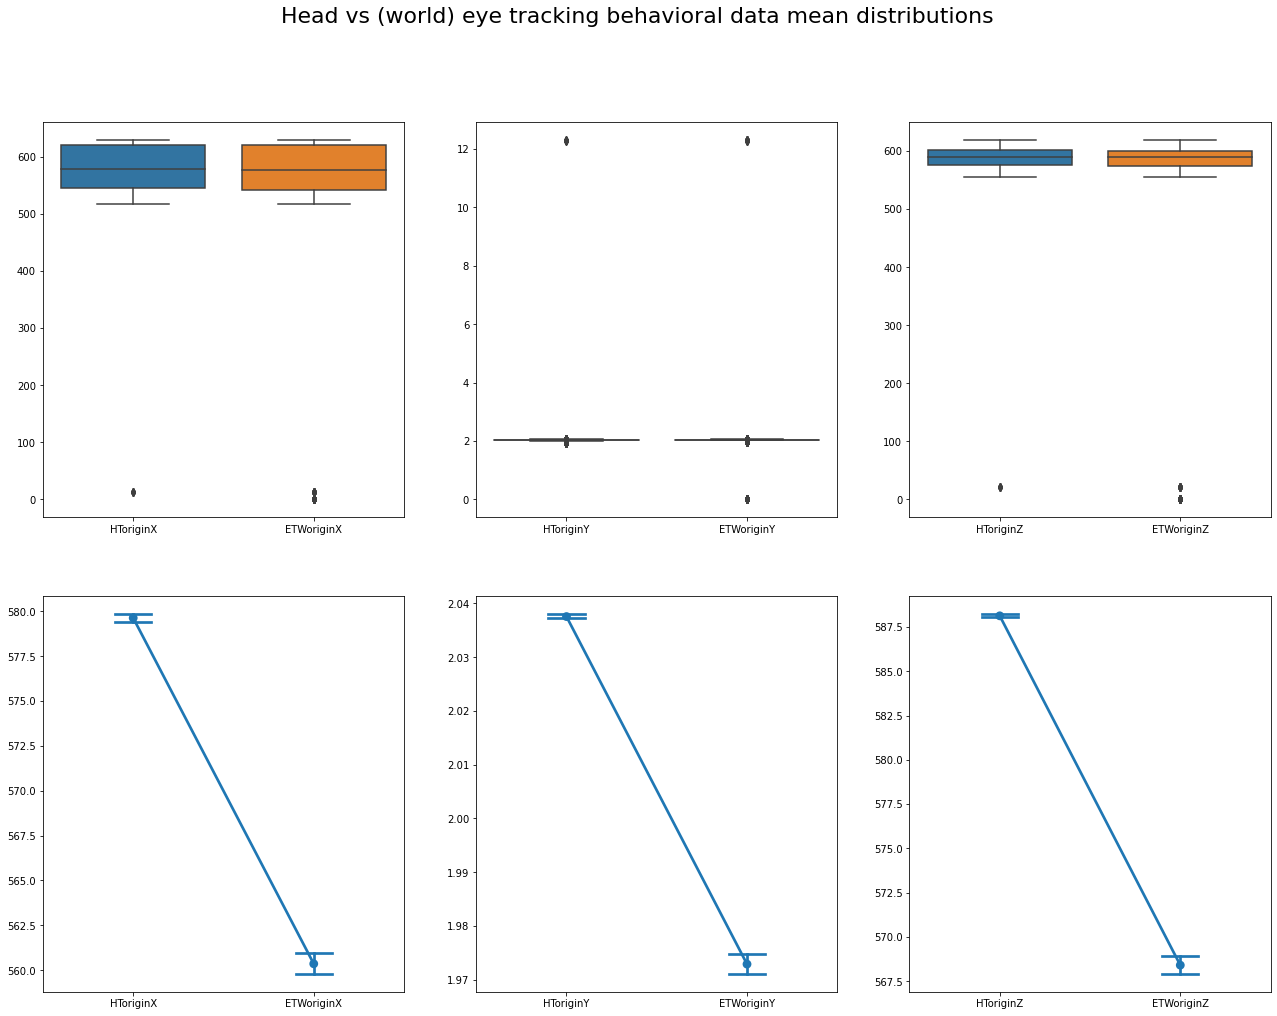

In [166]:
fig, ax = plt.subplots(2,3, figsize=(22, 16))

fig.suptitle("Head vs (world) eye tracking behavioral data mean distributions", fontsize=22)

# mean distributions comparing head to eye tracing
sns.boxplot(data=df_clean[['HToriginX','ETWoriginX']], ax=ax[0,0])
sns.boxplot(data=df_clean[['HToriginY', 'ETWoriginY']], ax=ax[0,1])
sns.boxplot(data=df_clean[['HToriginZ','ETWoriginZ']], ax=ax[0,2])

# representation of the estimated central tendency where the error bars indicate the uncertainty around the estimate.
sns.pointplot(data=df_clean[['HToriginX','ETWoriginX']], capsize=.2, ax=ax[1,0])
sns.pointplot(data=df_clean[['HToriginY', 'ETWoriginY']],capsize=.2, ax=ax[1,1])
sns.pointplot(data=df_clean[['HToriginZ','ETWoriginZ']], capsize=.2, ax=ax[1,2])


# these line plots show head and eye tracking data moving parallely
# sns.lineplot(data=df_clean[['HToriginX']], ax=ax[0,1])
# sns.lineplot(data=df_clean[['ETWoriginX']], ax=ax[0,2])

<AxesSubplot:>

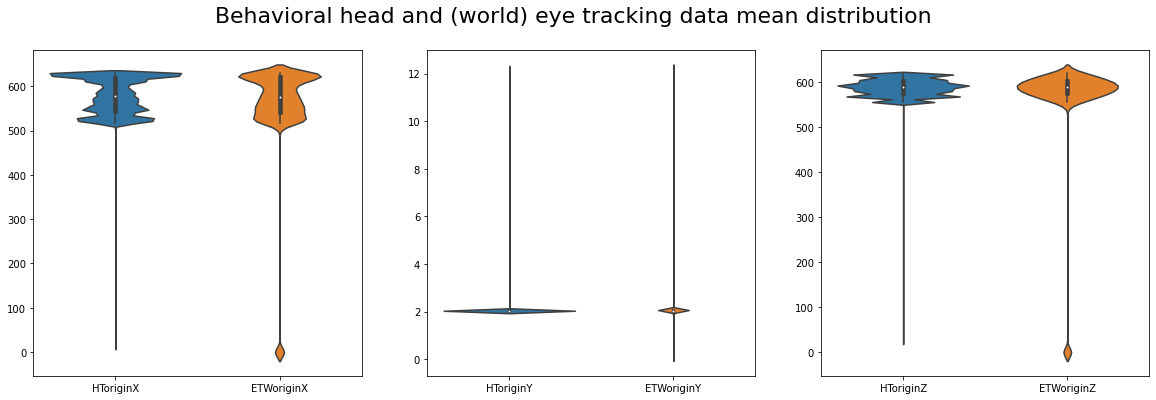

In [170]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))

fig.suptitle("Behavioral head and (world) eye tracking data mean distribution", fontsize=22)

sns.violinplot(data=df_clean[['HToriginX','ETWoriginX']], ax=ax[0])
sns.violinplot(data=df_clean[['HToriginY', 'ETWoriginY']], ax=ax[1])
sns.violinplot(data=df_clean[['HToriginZ', 'ETWoriginZ']], ax=ax[2])


### 2.2 Directions' mean directions

<AxesSubplot:>

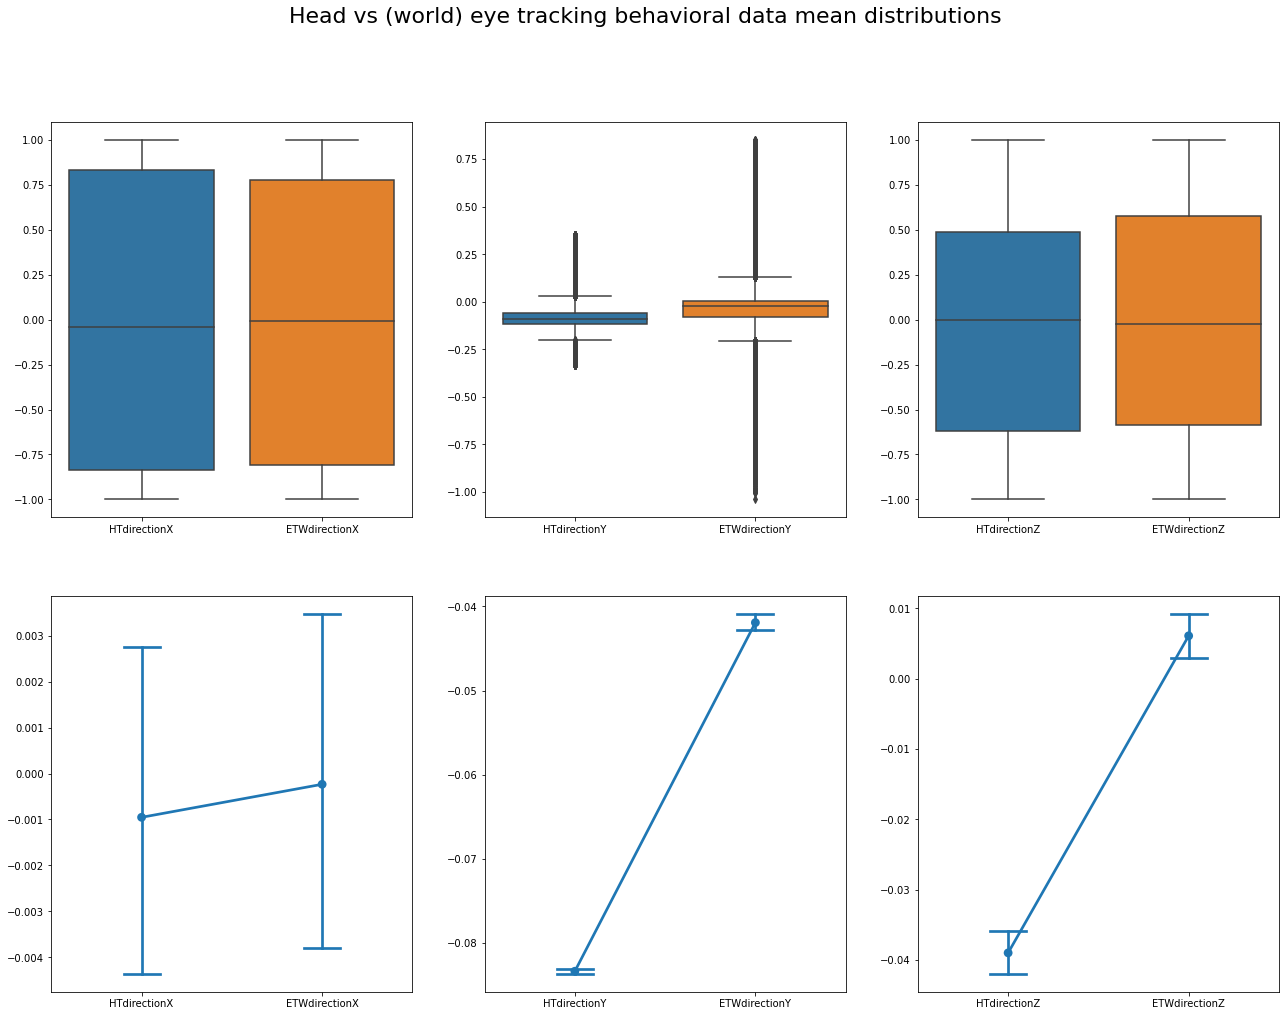

In [173]:
fig, ax = plt.subplots(2,3, figsize=(22, 16))

fig.suptitle("Head vs (world) eye tracking behavioral data mean distributions", fontsize=22)

# mean distributions comparing head to eye tracing
sns.boxplot(data=df_clean[['HTdirectionX','ETWdirectionX']], ax=ax[0,0])
sns.boxplot(data=df_clean[['HTdirectionY', 'ETWdirectionY']], ax=ax[0,1])
sns.boxplot(data=df_clean[['HTdirectionZ','ETWdirectionZ']], ax=ax[0,2])

# representation of the estimated central tendency where the error bars indicate the uncertainty around the estimate.
sns.pointplot(data=df_clean[['HTdirectionX','ETWdirectionX']], capsize=.2, ax=ax[1,0])
sns.pointplot(data=df_clean[['HTdirectionY', 'ETWdirectionY']],capsize=.2, ax=ax[1,1])
sns.pointplot(data=df_clean[['HTdirectionZ','ETWdirectionZ']], capsize=.2, ax=ax[1,2])

<AxesSubplot:>

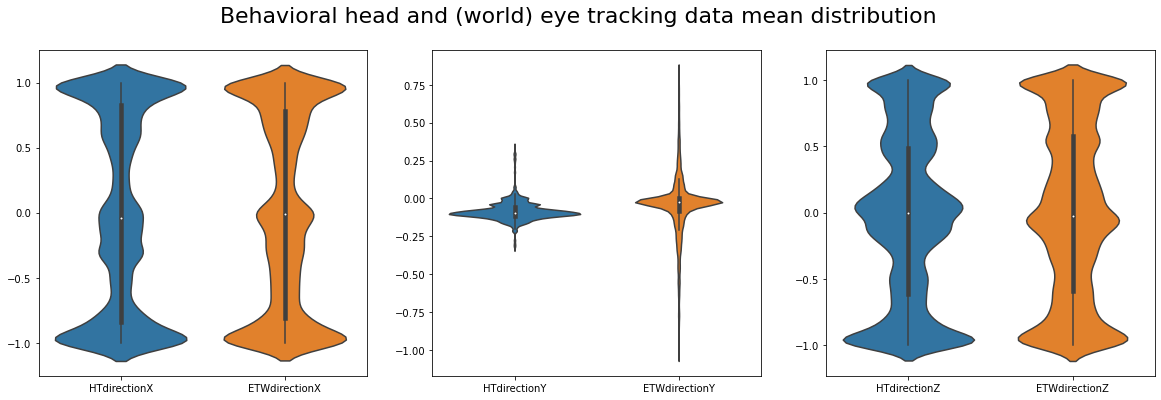

In [175]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))

fig.suptitle("Behavioral head and (world) eye tracking data mean distribution", fontsize=22)

# Unlike a box plot, in which all plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
sns.violinplot(data=df_clean[['HTdirectionX','ETWdirectionX']], ax=ax[0])
sns.violinplot(data=df_clean[['HTdirectionY', 'ETWdirectionY']], ax=ax[1])
sns.violinplot(data=df_clean[['HTdirectionZ', 'ETWdirectionZ']], ax=ax[2])

In [ ]:
eyes_local_origin = df[["ETLoriginX", "ETLoriginY", "ETLoriginZ"]]

eyes_local_origin

In [ ]:
eyes_local_origin.boxplot()

eyes_local_origin.plot.hist()


In [9]:
eyes_local_direction = df_clean[['ETWoriginX', 'ETWoriginY', 'ETWoriginZ', 'ETWdirectionX',
       'ETWdirectionY', 'ETWdirectionZ']]

eyes_local_direction.head(50)

,ETWoriginX,ETWoriginY,ETWoriginZ,ETWdirectionX,ETWdirectionY,ETWdirectionZ
0,13.412971,12.306775,21.046938,0.942591,0.099437,-0.325585
1,13.412885,12.306769,21.046755,0.942547,0.099320,-0.325718
2,13.412885,12.306769,21.046755,0.942547,0.099320,-0.325718
3,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898
4,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898
5,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898
6,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898
7,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898
8,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898
9,547.543760,2.049087,589.386500,0.942298,0.102535,-0.325898


<AxesSubplot:ylabel='Frequency'>

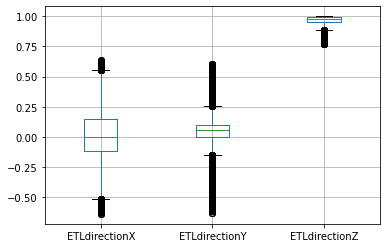

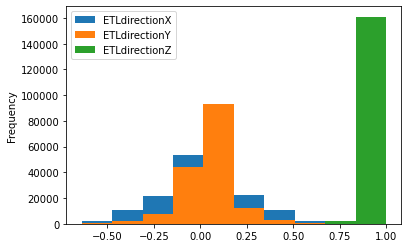

In [57]:
eyes_local_direction.boxplot()
eyes_local_direction.plot.hist()

In [68]:
eyes_world_direction = df_clean[["ETWdirectionX", "ETWdirectionY", "ETWdirectionZ"]]

eyes_world_direction.head()

,ETWdirectionX,ETWdirectionY,ETWdirectionZ
0,0.942591,0.099437,-0.325585
1,0.942547,0.099320,-0.325718
2,0.942547,0.099320,-0.325718
3,0.942298,0.102535,-0.325898
4,0.942298,0.102535,-0.325898


<AxesSubplot:ylabel='Frequency'>

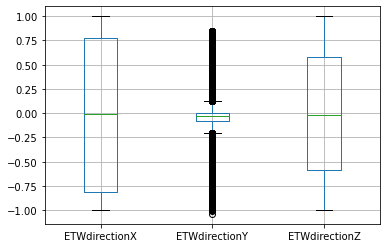

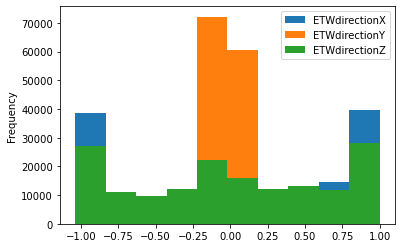

In [66]:
eyes_world_direction.boxplot()

eyes_world_direction.plot.hist()

Explore for HTorigin values bigger than initial 547.551270 in player_direction